<h1 align="center"><span style='font-family:arial'>Chocolate Bars Listing</h1>

<h6 align="center"><span style='font-family:arial'>by Iman Ngwepe-Ntshibida</h6>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading data

In [2]:
# creating a DataFrame from the chocolate bars file
df = pd.read_csv('chocolate_bars.csv')
# looking at size and five random rows in the dataset 
print(df.shape)
df.sample(5)

(2530, 11)


,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
1720,1411,Ocho,New Zealand,2014,Papua New Guinea,"PNG, Nib Bar, WAG1",74.0,2.0,"B,S","smokey, intense, coffee",3.50
275,256,Black Mountain,U.S.A.,2008,Venezuela,Carenero Superior,70.0,3.0,"B,S,C","sweet grass, muted spice",2.75
2272,1450,Tablette (aka Vanillabeans),Japan,2015,Vietnam,Vietnam,60.0,5.0,"B,S,C,V,L","vanilla, butter, caramel",3.25
560,209,Chocovic,Spain,2008,Venezuela,Ocumare,71.0,4.0,"B,S,C,L","long lasting, cocoa base",3.50
1234,1542,Izard,U.S.A.,2015,Belize,"Maya Mountain, Toledo, Batch 29",70.0,2.0,"B,S","intense, cherry, rich, metallic",3.50


In [3]:
# checking maximum rows
pd.options.display.max_rows

60

In [4]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


* The dataset has 2530 rows and 11 columns, it contains data about different chocolate bars, from various manufactures and countries. The information encompasses the quality and likability of the bars. 

In [5]:
# statistical summary
df.describe(include='all')

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
count,2530.000000,2530,2530,2530.000000,2530,2530,2530.000000,2443.000000,2443,2530,2530.000000
unique,NaN,580,67,NaN,62,1605,NaN,NaN,21,2487,NaN
top,NaN,Soma,U.S.A.,NaN,Venezuela,Madagascar,NaN,NaN,"B,S,C","spicy, cocoa",NaN
freq,NaN,56,1136,NaN,253,55,NaN,NaN,999,4,NaN
mean,1429.800791,NaN,NaN,2014.374308,NaN,NaN,71.639723,3.041343,NaN,NaN,3.196344
std,757.648556,NaN,NaN,3.968267,NaN,NaN,5.616724,0.913728,NaN,NaN,0.445321
min,5.000000,NaN,NaN,2006.000000,NaN,NaN,42.000000,1.000000,NaN,NaN,1.000000
25%,802.000000,NaN,NaN,2012.000000,NaN,NaN,70.000000,2.000000,NaN,NaN,3.000000
50%,1454.000000,NaN,NaN,2015.000000,NaN,NaN,70.000000,3.000000,NaN,NaN,3.250000
75%,2079.000000,NaN,NaN,2018.000000,NaN,NaN,74.000000,4.000000,NaN,NaN,3.500000


* At a glance: The top manufacturer is Soma, top company location is USA, Top Beans come from Venezuela, the most occurring ingredient is B,S,C and the common review is 'spicy, cocoa'. We have 55 bars names.

### Data cleaning

In [6]:
# making copy of the DataFrame
choco_bars =df.copy()

In [7]:
choco_bars['year_reviewed'].dtype

dtype('int64')

In [8]:
# looking at missing values
choco_bars.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

- There are no duplicated entries, however the *num_ingredients* and *ingredients* columns have missing values.


`Filling in the nulls`

In [9]:
# Data types of "num_ingredients" and "ingredients"
choco_bars['num_ingredients'].dtype, choco_bars['ingredients'].dtype

(dtype('float64'), dtype('O'))

In [10]:
# Distint values of "num_ingredients" and "ingredients"
choco_bars['ingredients'].unique(), choco_bars['num_ingredients'].unique()

(array(['B,S,C', 'B,S,C,L', 'B,S', 'B,S,C,V', 'B,S,C,V,L', 'B,S,C,V,L,Sa',
        'B,S,C,V,Sa', nan, 'B,S,V,L', 'B,S*', 'B', 'B,S*,C', 'B,S,L',
        'B,S,V', 'B,S*,C,L', 'B,S*,C,Sa', 'B,S*,Sa', 'B,S,C,Sa',
        'B,S*,V,L', 'B,C', 'B,S*,C,V', 'B,S,C,L,Sa'], dtype=object),
 array([ 3.,  4.,  2.,  5.,  6., nan,  1.]))

In [11]:
# mean of "num_ingredients"
choco_bars['num_ingredients'].mean()

3.0413426115431847

In [12]:
# Mode of "ingredients"
choco_bars['ingredients'].mode()

0    B,S,C
Name: ingredients, dtype: object

In [13]:
# Filling in 'num_ingredients'
choco_bars['num_ingredients'].fillna(3, inplace=True)
# Filling in 'ingredients'
choco_bars['ingredients'].fillna('B,S,C', inplace=True)

In [14]:
# Checking the data frame again
choco_bars.isna().sum()

id                  0
manufacturer        0
company_location    0
year_reviewed       0
bean_origin         0
bar_name            0
cocoa_percent       0
num_ingredients     0
ingredients         0
review              0
rating              0
dtype: int64

In [15]:
# increasing maximum number of rows to display entired DataFrame
#pd.options.display.max_rows = 9999
#choco_bars

In [16]:
# Features of the categorical columns
categorical = [feat for feat in choco_bars.columns if choco_bars[feat].dtype == 'O']
categorical

['manufacturer',
 'company_location',
 'bean_origin',
 'bar_name',
 'ingredients',
 'review']

In [17]:
# Features of the numerical columns
numerical = [feat for feat in choco_bars.columns if choco_bars[feat].dtype != 'O']
numerical

['id', 'year_reviewed', 'cocoa_percent', 'num_ingredients', 'rating']

> ### Questions


`1. What is the average rating by country of origin ?`

In [18]:
choco_bars['rating'].value_counts()

3.50    565
3.00    523
3.25    464
2.75    333
3.75    300
2.50    166
4.00    112
2.00     33
2.25     17
1.50     10
1.00      4
1.75      3
Name: rating, dtype: int64

In [19]:
avg_rating = choco_bars.groupby('bean_origin')[['rating']].mean().reset_index().sort_values(by='rating', ascending=False)
avg_rating

,bean_origin,rating
54,Tobago,3.625000
7,China,3.500000
42,Sao Tome & Principe,3.500000
44,Solomon Islands,3.450000
9,Congo,3.318182
...,...,...
43,Sierra Leone,2.750000
47,St.Vincent-Grenadines,2.750000
38,Principe,2.750000
30,Martinique,2.750000


In [20]:
type(avg_rating)

pandas.core.frame.DataFrame

In [21]:
avg_rating.columns

Index(['bean_origin', 'rating'], dtype='object')

`2. How many bars were reviewed for each of those countries origin?`

In [22]:
choco_bars.review.dtype

dtype('O')

In [23]:
# bar reviews
bar_review = choco_bars.groupby('bean_origin')[['review']].count().reset_index().\
sort_values(by='review', ascending=False)
bar_review

,bean_origin,review
60,Venezuela,253
36,Peru,244
13,Dominican Republic,226
14,Ecuador,219
28,Madagascar,177
...,...,...
50,Suriname,1
49,Sumatra,1
48,Sulawesi,1
47,St.Vincent-Grenadines,1


In [24]:
type(bar_review)

pandas.core.frame.DataFrame

In [25]:
bar_review.columns

Index(['bean_origin', 'review'], dtype='object')

`Plots of Q1 and Q2.`

In [26]:
# For image quality of the graphics
sns.set(rc = {"figure.dpi":300})
# For size of the graphics
sns.set(rc = {"figure.figsize":(20,5)})

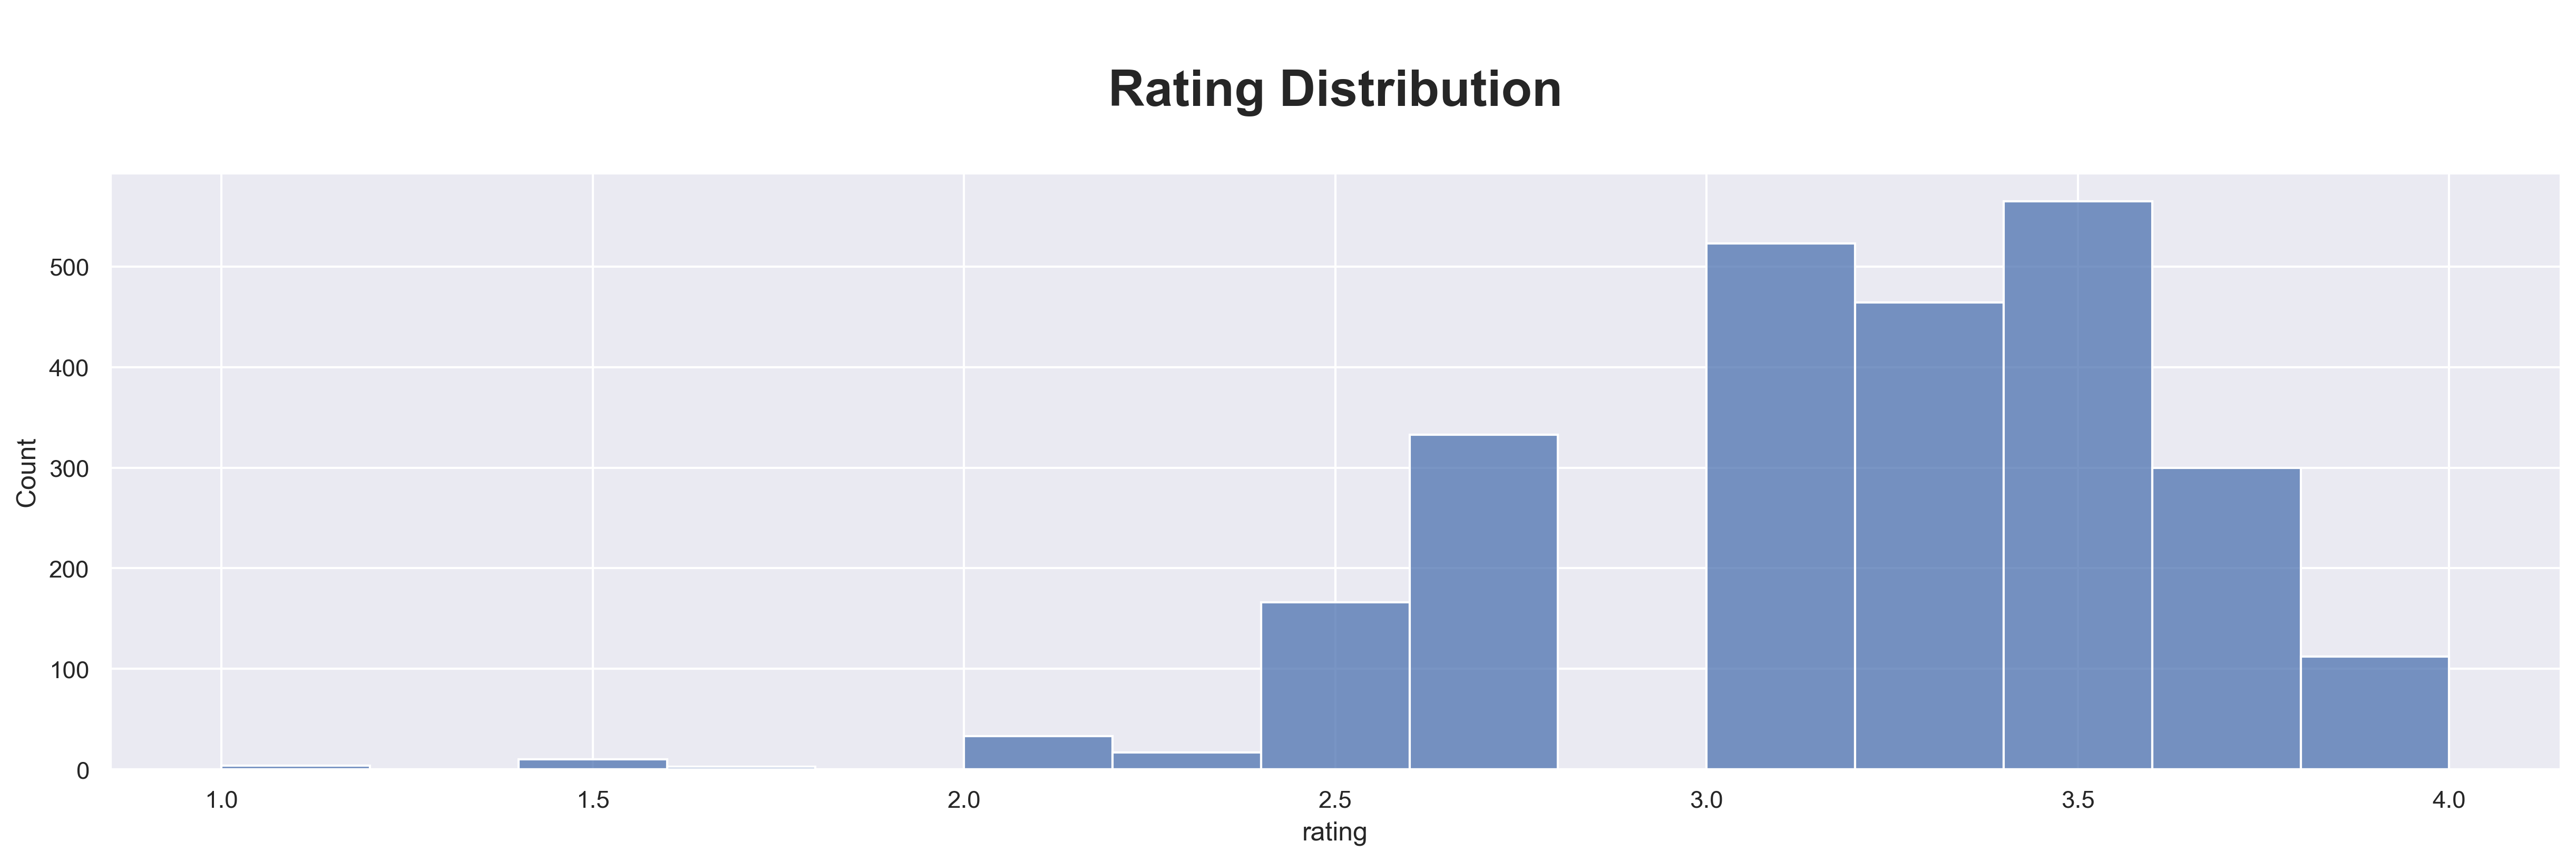

In [27]:
# rating frequency
sns.histplot(data=df, x='rating', bins=15)
plt.title('\n Rating Distribution \n', fontsize=23, fontweight='bold');

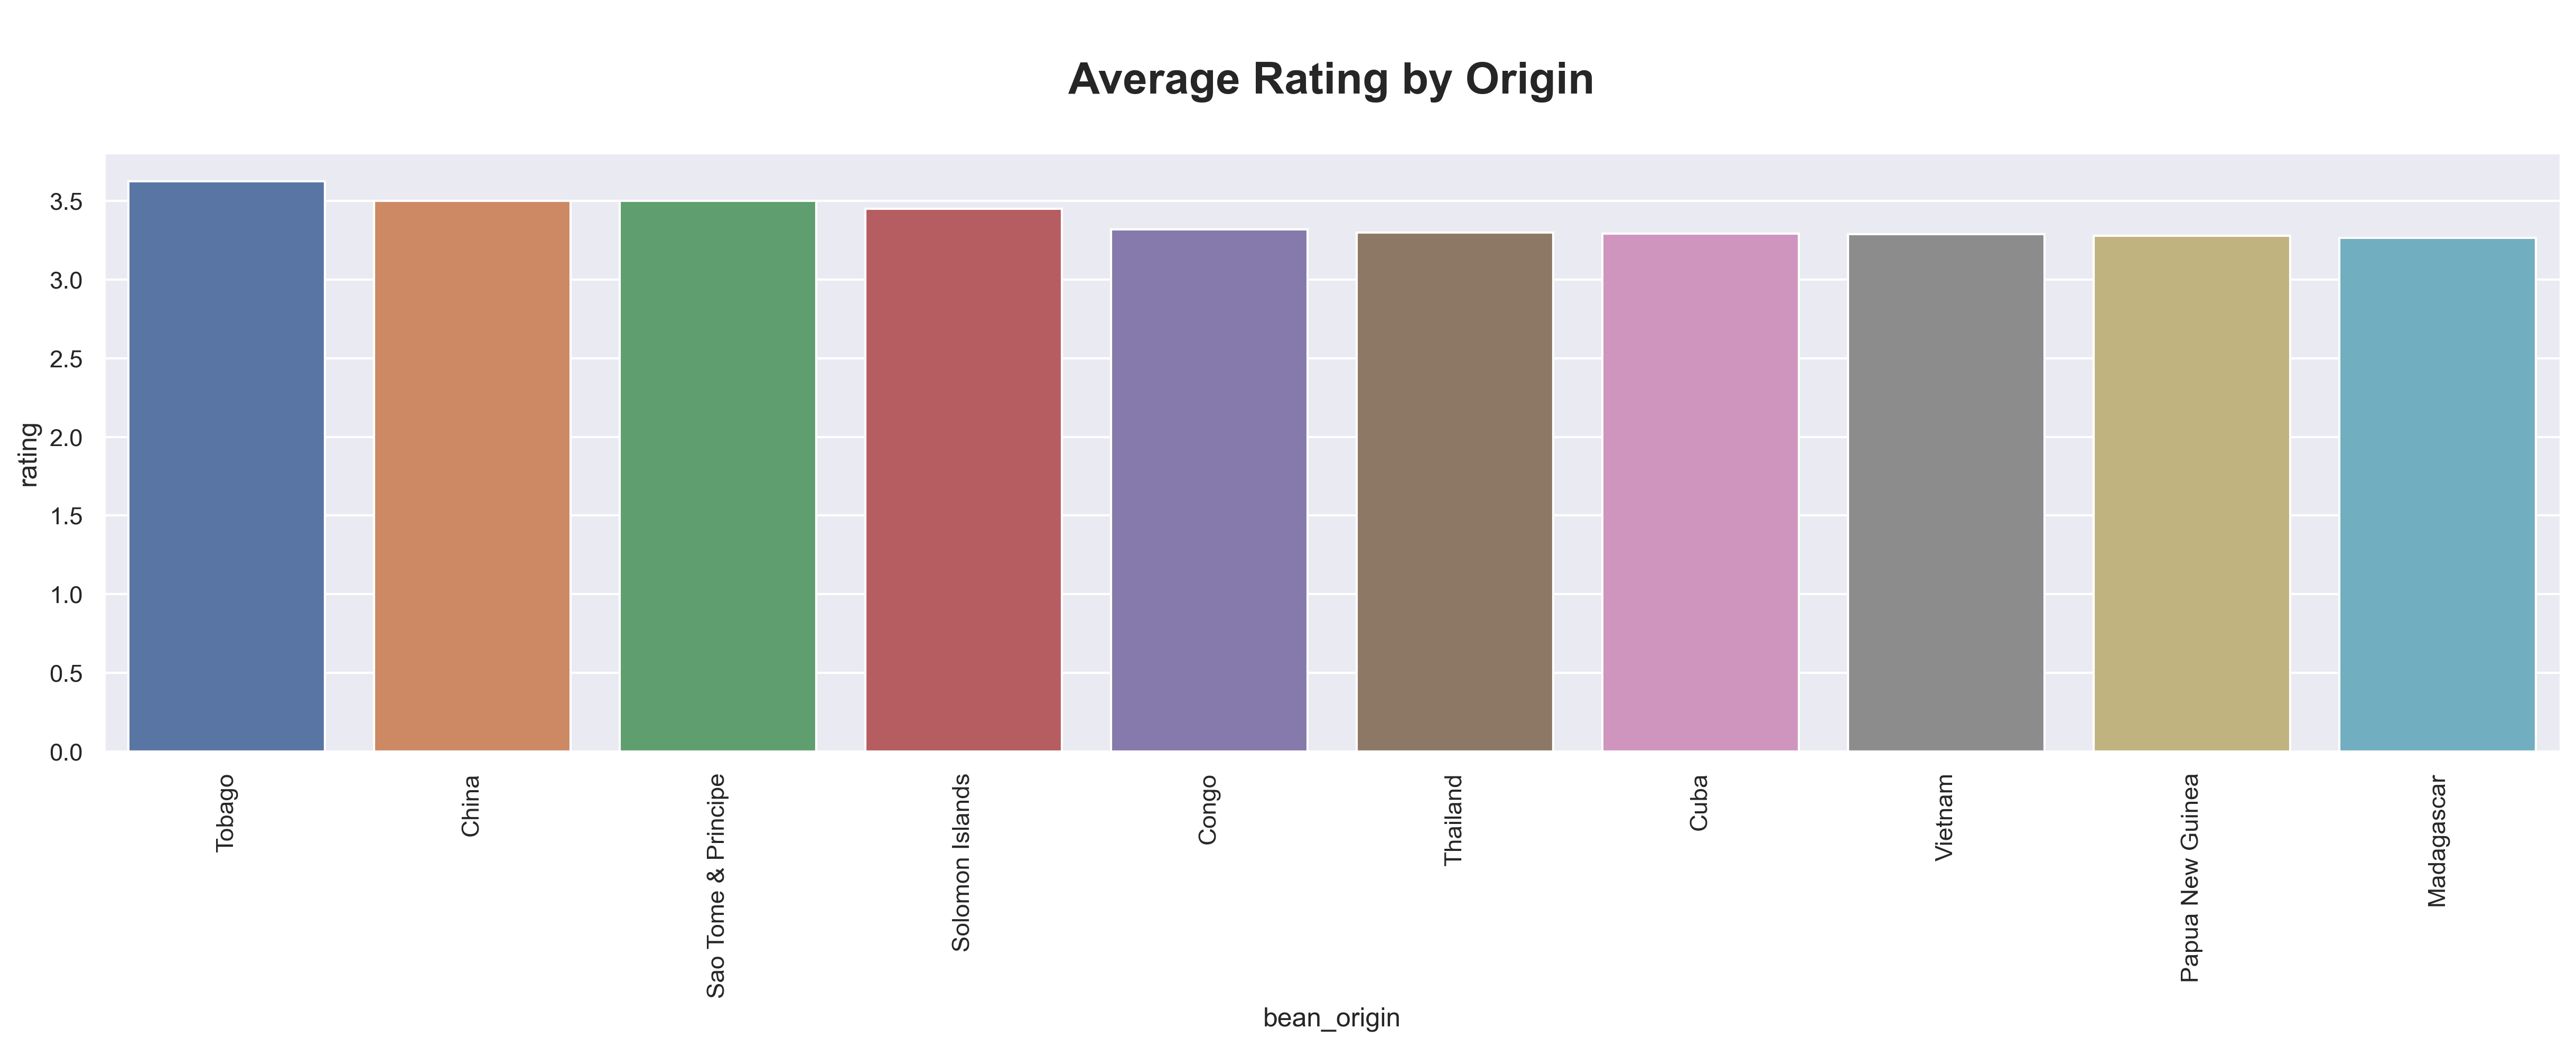

In [28]:
# average rating by origin
# top 10 
sns.barplot(x="bean_origin", y="rating",data = avg_rating[:10])
plt.title('\n Average Rating by Origin \n', fontsize=20, fontweight='bold')
plt.xticks(rotation=90);

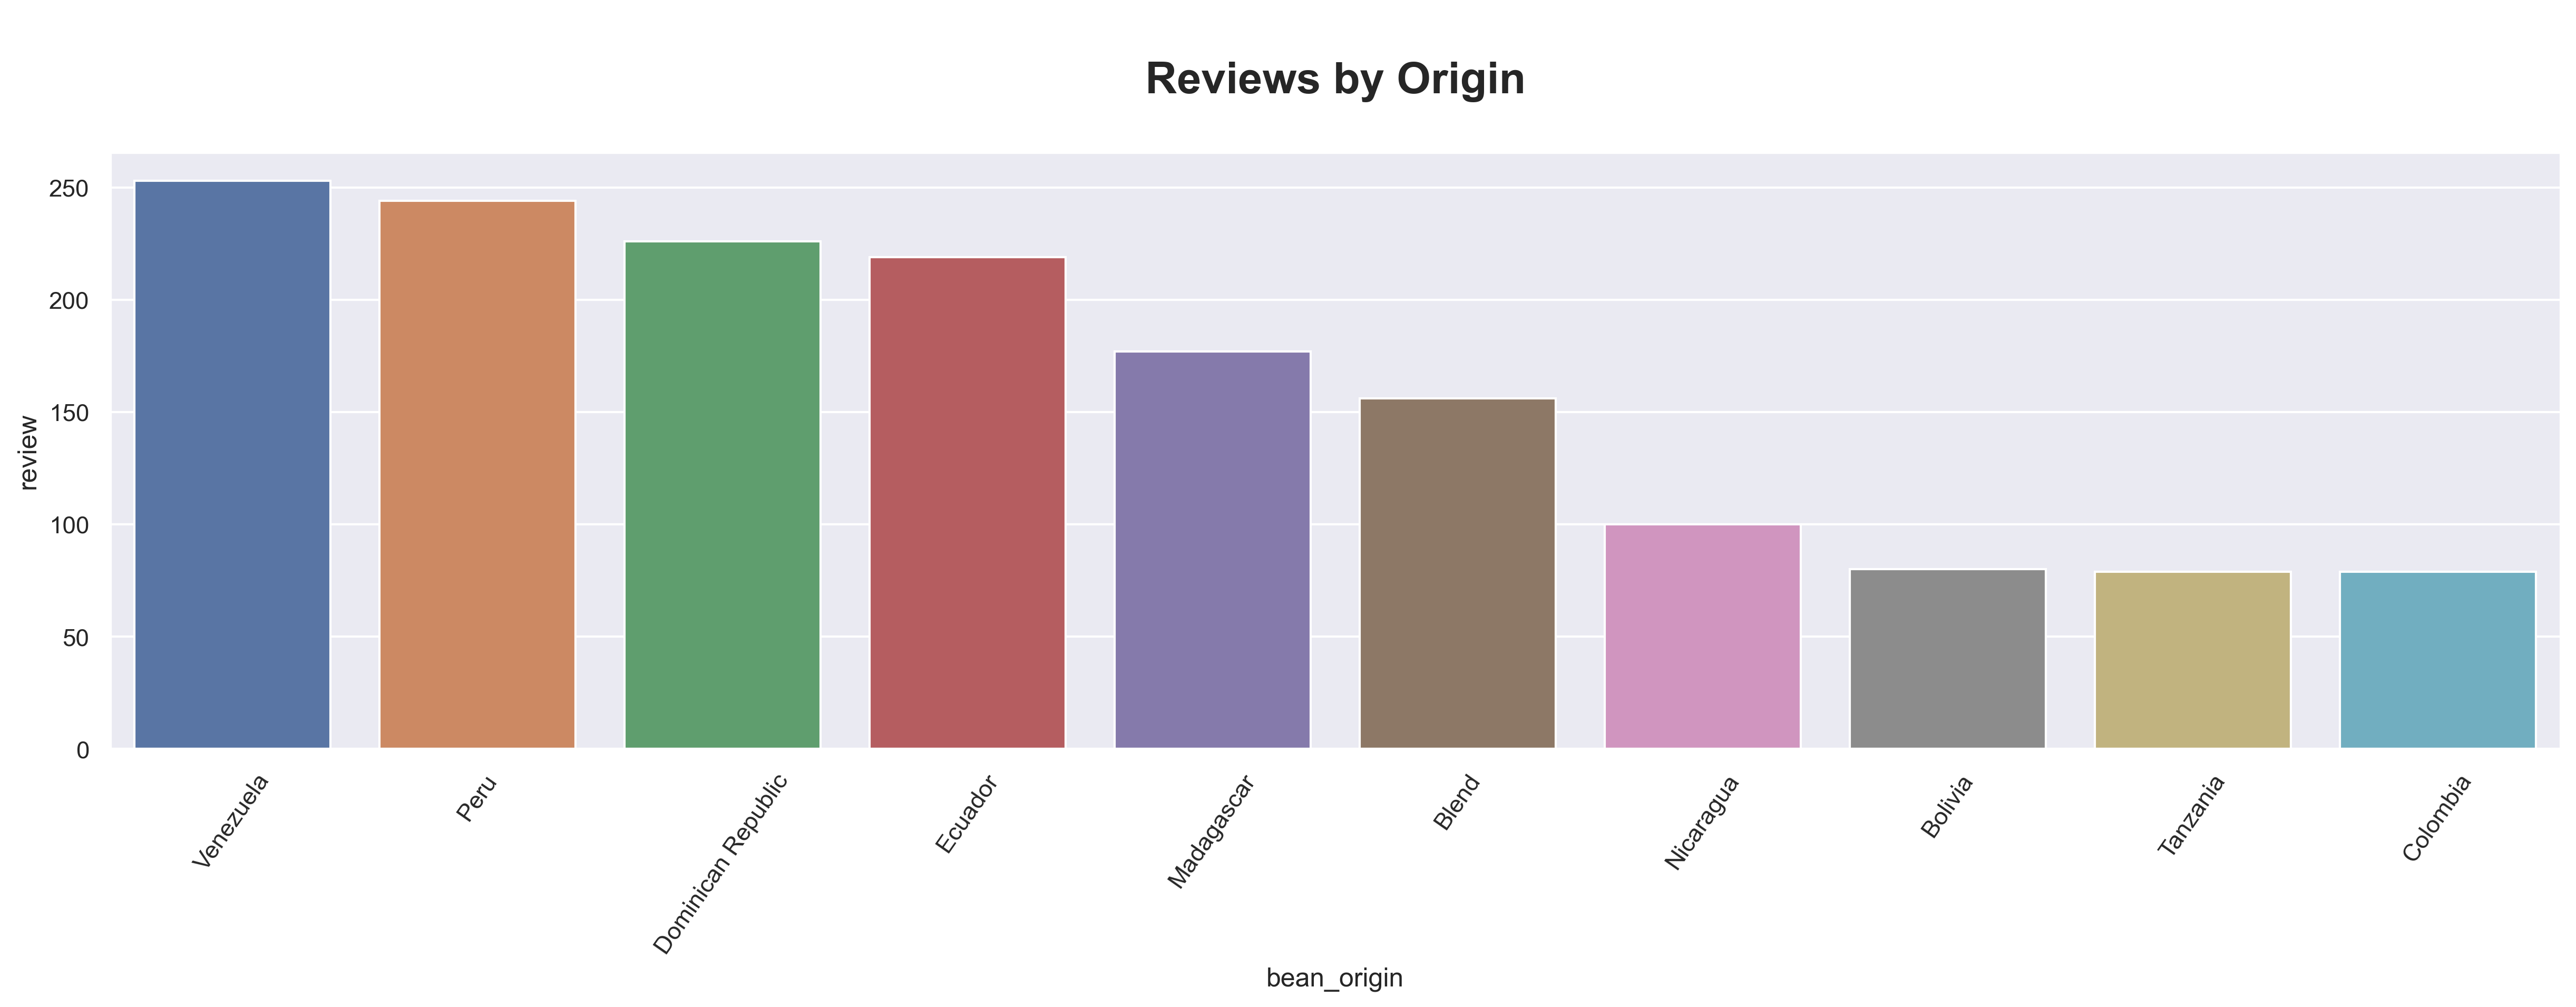

In [29]:
# chocolate bars reviewed by origin
# top 10 
sns.barplot(x="bean_origin", y="review",data = bar_review[:10])
plt.title('\n Reviews by Origin \n', fontsize=20, fontweight='bold')
plt.xticks(rotation=55);

`4. Is the cacao bean's origin an indicator of quality ?`

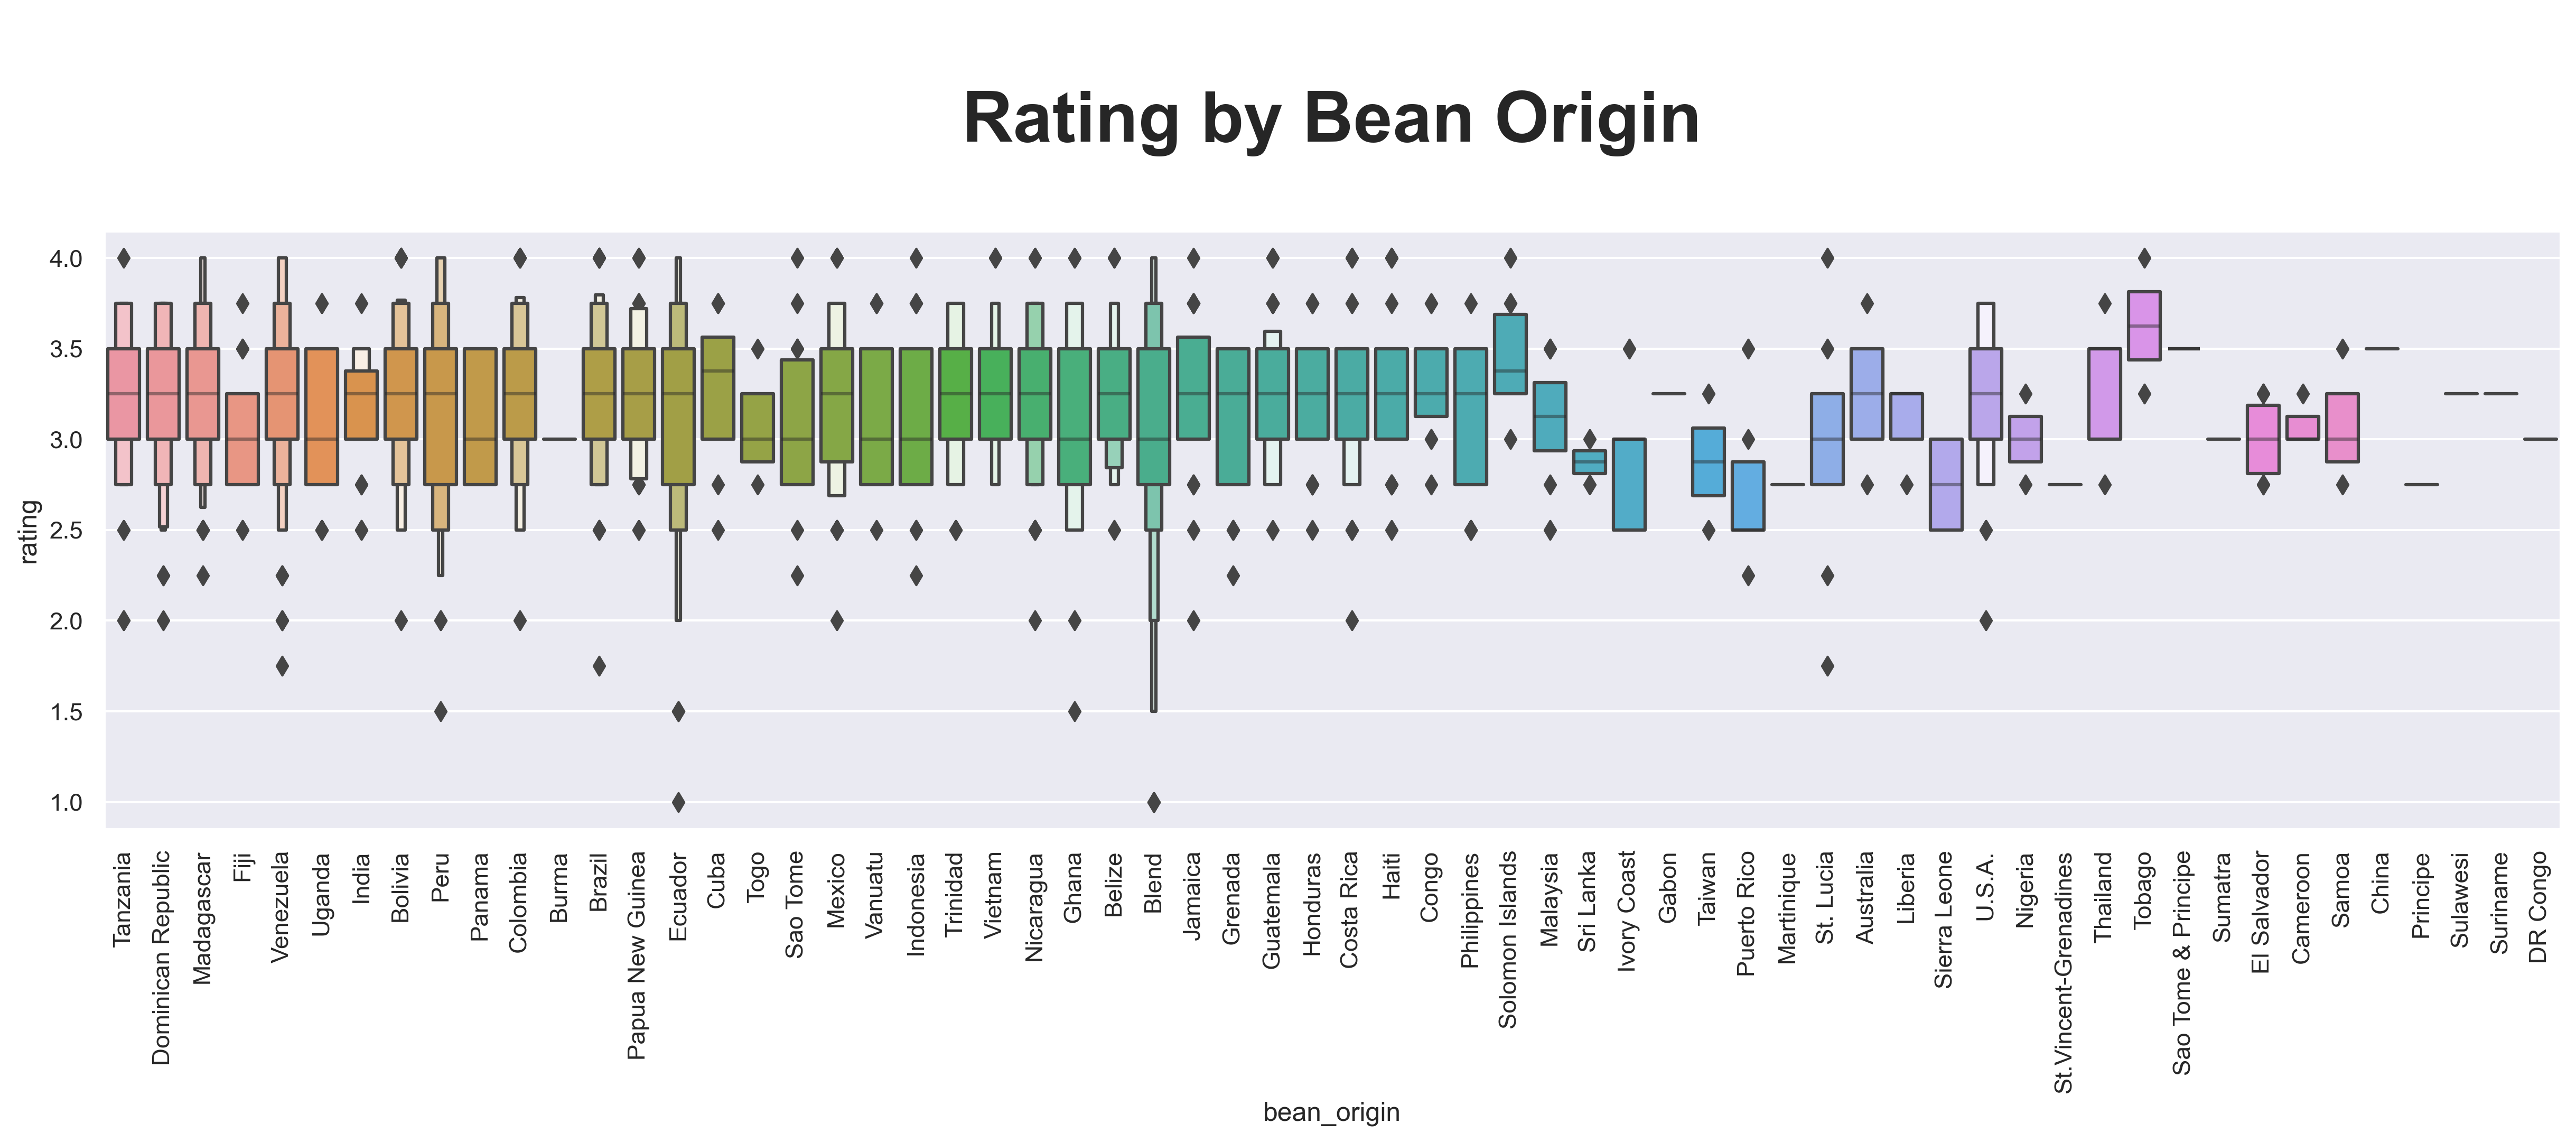

In [30]:
# checking chocolate bar quality
sns.boxenplot(data=choco_bars, x='bean_origin', y='rating')
plt.title('\n Rating by Bean Origin \n', fontsize=32, fontweight='bold')
plt.xticks(rotation=90)
plt.show();

* The cacao bean origin is not a predictor of quality because the median and IQR for some of the nations are similar and the rating data is not normally distributed. Rating outliers appear in the great majority of bean origin.  

`5. How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings(above 3.5) ?`

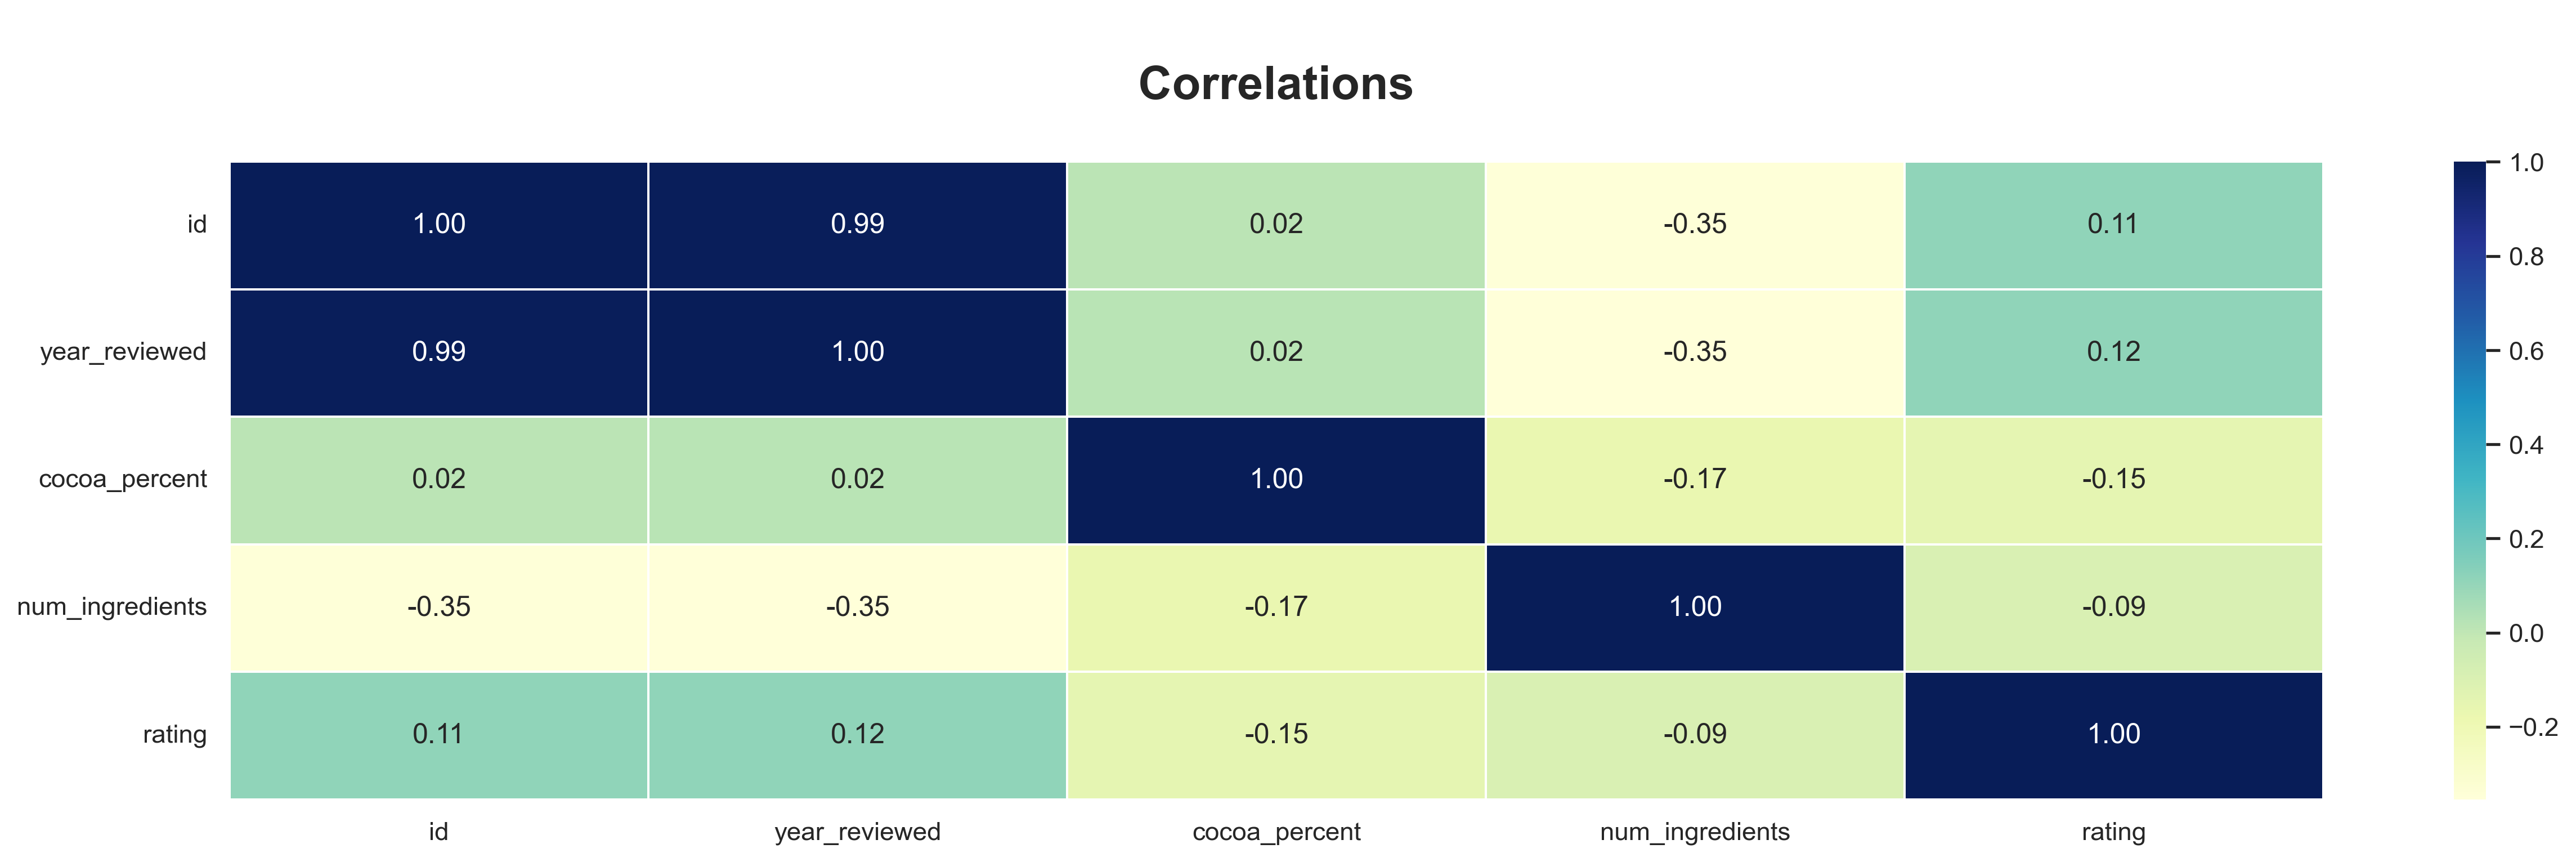

In [31]:
# Heatmap
df1 = choco_bars.corr()
sns.heatmap(data=df1,annot=True, fmt='.2f',linewidths=0.5,cmap='YlGnBu')
plt.title('\n Correlations \n', fontsize=20, fontweight='bold');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


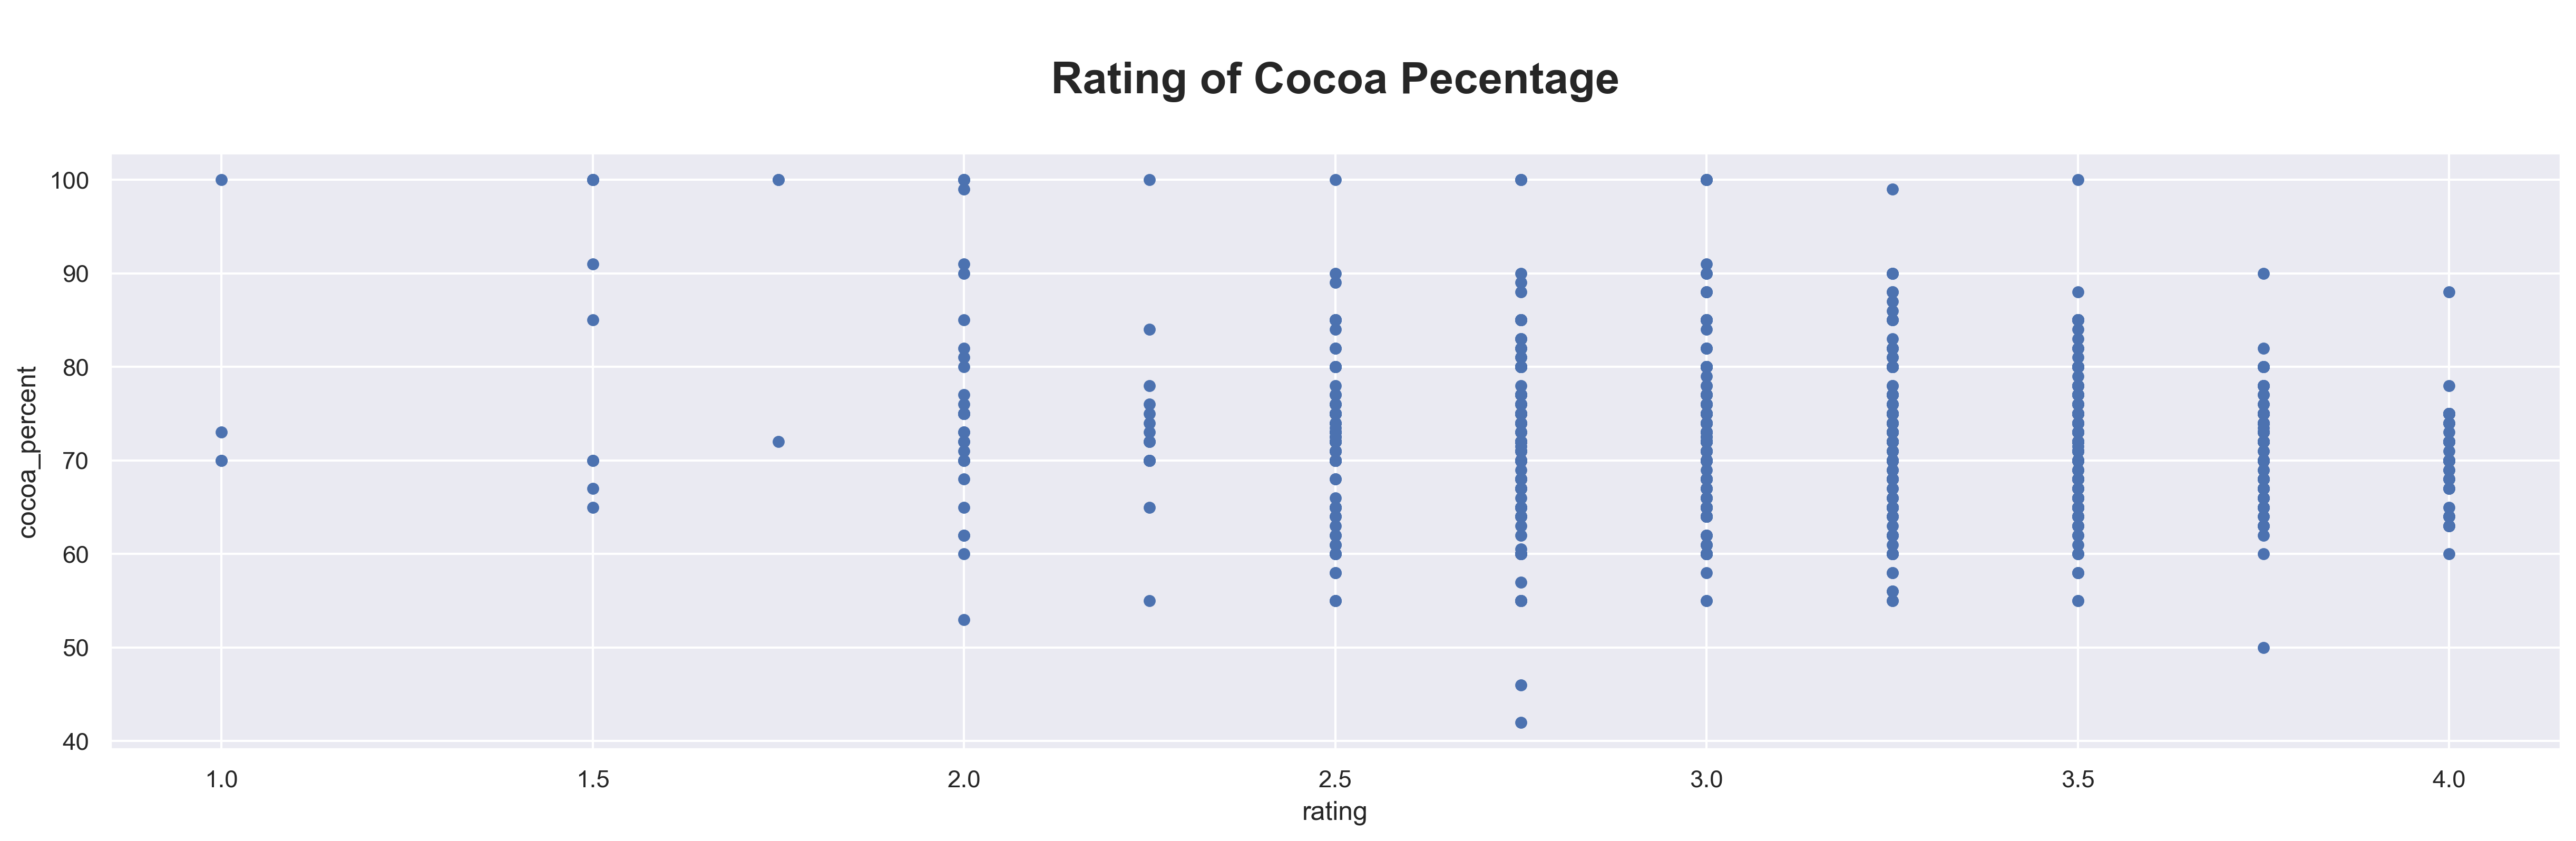

In [32]:
# plot of rating vs cocoa percent
choco_bars.plot(kind='scatter', x='rating', y='cocoa_percent')
plt.title('\n Rating of Cocoa Pecentage \n', fontsize=20, fontweight='bold');

* At r = -0.15, 'rating' and 'cocoa percent' have an infinitesimal negative correlation, essentially there is no relation between them.

In [33]:
# average cocoa content
avg_cocoa = choco_bars.groupby('rating')[['cocoa_percent']].mean()\
.reset_index().sort_values(by='rating', ascending=False)
avg_cocoa

,rating,cocoa_percent
11,4.00,70.696429
10,3.75,71.041667
9,3.50,71.225664
8,3.25,71.431034
7,3.00,71.738050
6,2.75,72.099099
5,2.50,71.671687
4,2.25,73.294118
3,2.00,76.575758
2,1.75,90.666667


* Average cocoa percentage of bars rated above 3.5 is 71%.

`6. Compare average rating of bars with and without Lecithin(L).`

In [34]:
# distinct ingredients
choco_bars['ingredients'].unique()

array(['B,S,C', 'B,S,C,L', 'B,S', 'B,S,C,V', 'B,S,C,V,L', 'B,S,C,V,L,Sa',
       'B,S,C,V,Sa', 'B,S,V,L', 'B,S*', 'B', 'B,S*,C', 'B,S,L', 'B,S,V',
       'B,S*,C,L', 'B,S*,C,Sa', 'B,S*,Sa', 'B,S,C,Sa', 'B,S*,V,L', 'B,C',
       'B,S*,C,V', 'B,S,C,L,Sa'], dtype=object)

In [35]:
# number of ingredients
choco_bars['ingredients'].count()

2530

In [36]:
# number of unique counts of ingredients 
choco_bars['ingredients'].value_counts()

B,S,C           1086
B,S              718
B,S,C,L          286
B,S,C,V,L        184
B,S,C,V          141
B,S*              31
B,S*,C,Sa         20
B,S*,C            12
B,S,L              8
B,S*,C,V           7
B                  6
B,S,C,V,Sa         6
B,S,V,L            5
B,S,C,Sa           5
B,S,C,V,L,Sa       4
B,S,V              3
B,S*,V,L           3
B,S*,C,L           2
B,S*,Sa            1
B,C                1
B,S,C,L,Sa         1
Name: ingredients, dtype: int64

In [37]:
# categorising ingredients
without_L = ['B,S,C', 'B,S', 'B,S,C,V', 'B,S*', 'B,S*,C,Sa','B,S*,C', 'B,S*,C,V', 'B', 'B,S,C,V,Sa',
             'B,S,C,Sa', 'B,S,V', 'B,S*,Sa', 'B,C']
with_L = ['B,S,C,L', 'B,S,C,V,L', 'B,S,L', 'B,S,V,L', 'B,S,C,V,L,Sa', 'B,S*,V,L',
          'B,S*,C,L', 'B,S,C,L,Sa']

In [38]:
ingr_rating = choco_bars.groupby('ingredients')[['rating']].mean().reset_index().\
sort_values(by='rating', ascending=False)

In [39]:
ingr_rating

,ingredients,rating
10,"B,S,C",3.241022
2,"B,S",3.229457
11,"B,S,C,L",3.213287
19,"B,S,V",3.166667
13,"B,S,C,Sa",3.150000
6,"B,S*,C,Sa",3.112500
15,"B,S,C,V,L",3.089674
9,"B,S*,V,L",3.083333
7,"B,S*,C,V",3.000000
1,"B,C",3.000000


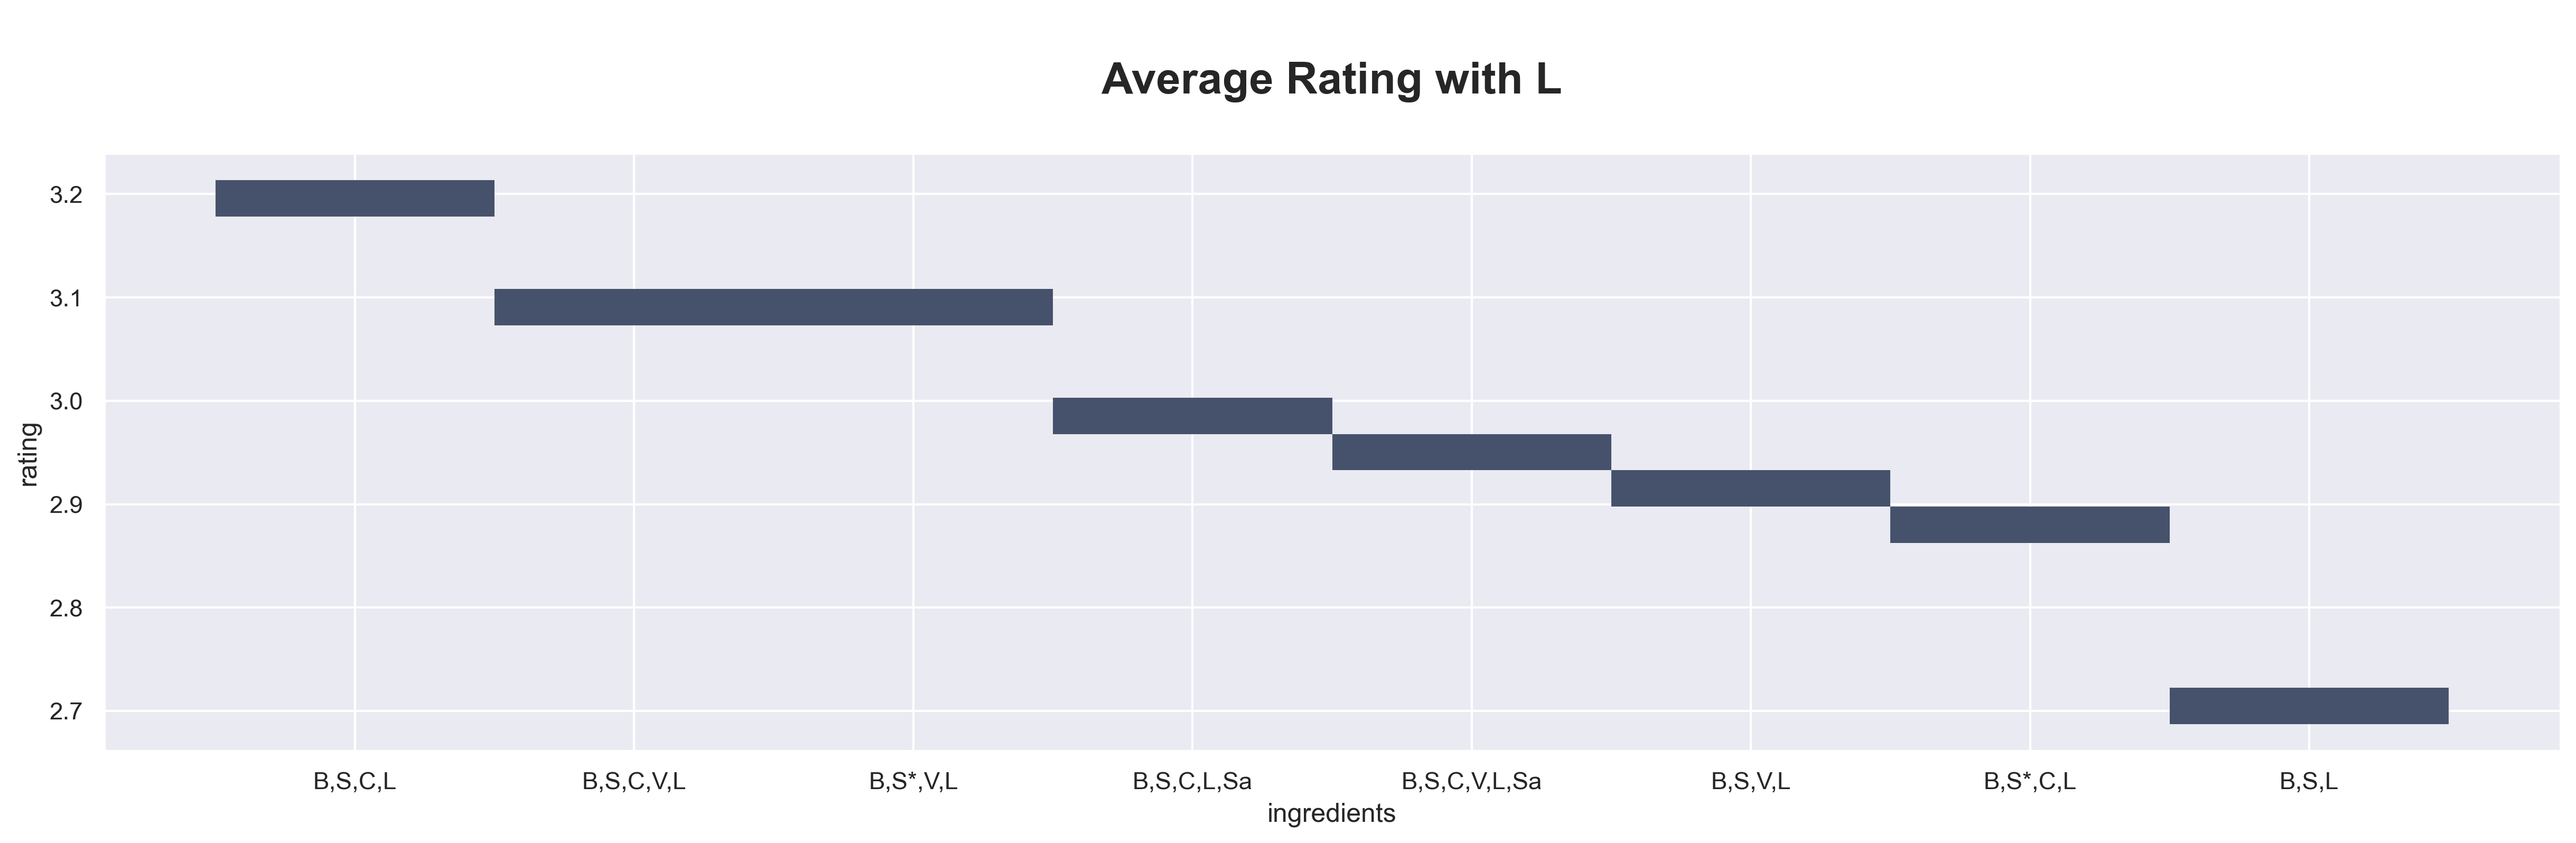

In [40]:
# ditribution plot 1
sns.histplot(data=ingr_rating[ingr_rating['ingredients'].isin(with_L)],\
             x='ingredients', y='rating', bins=15)
plt.title('\n Average Rating with L \n', fontsize=20, fontweight='bold');

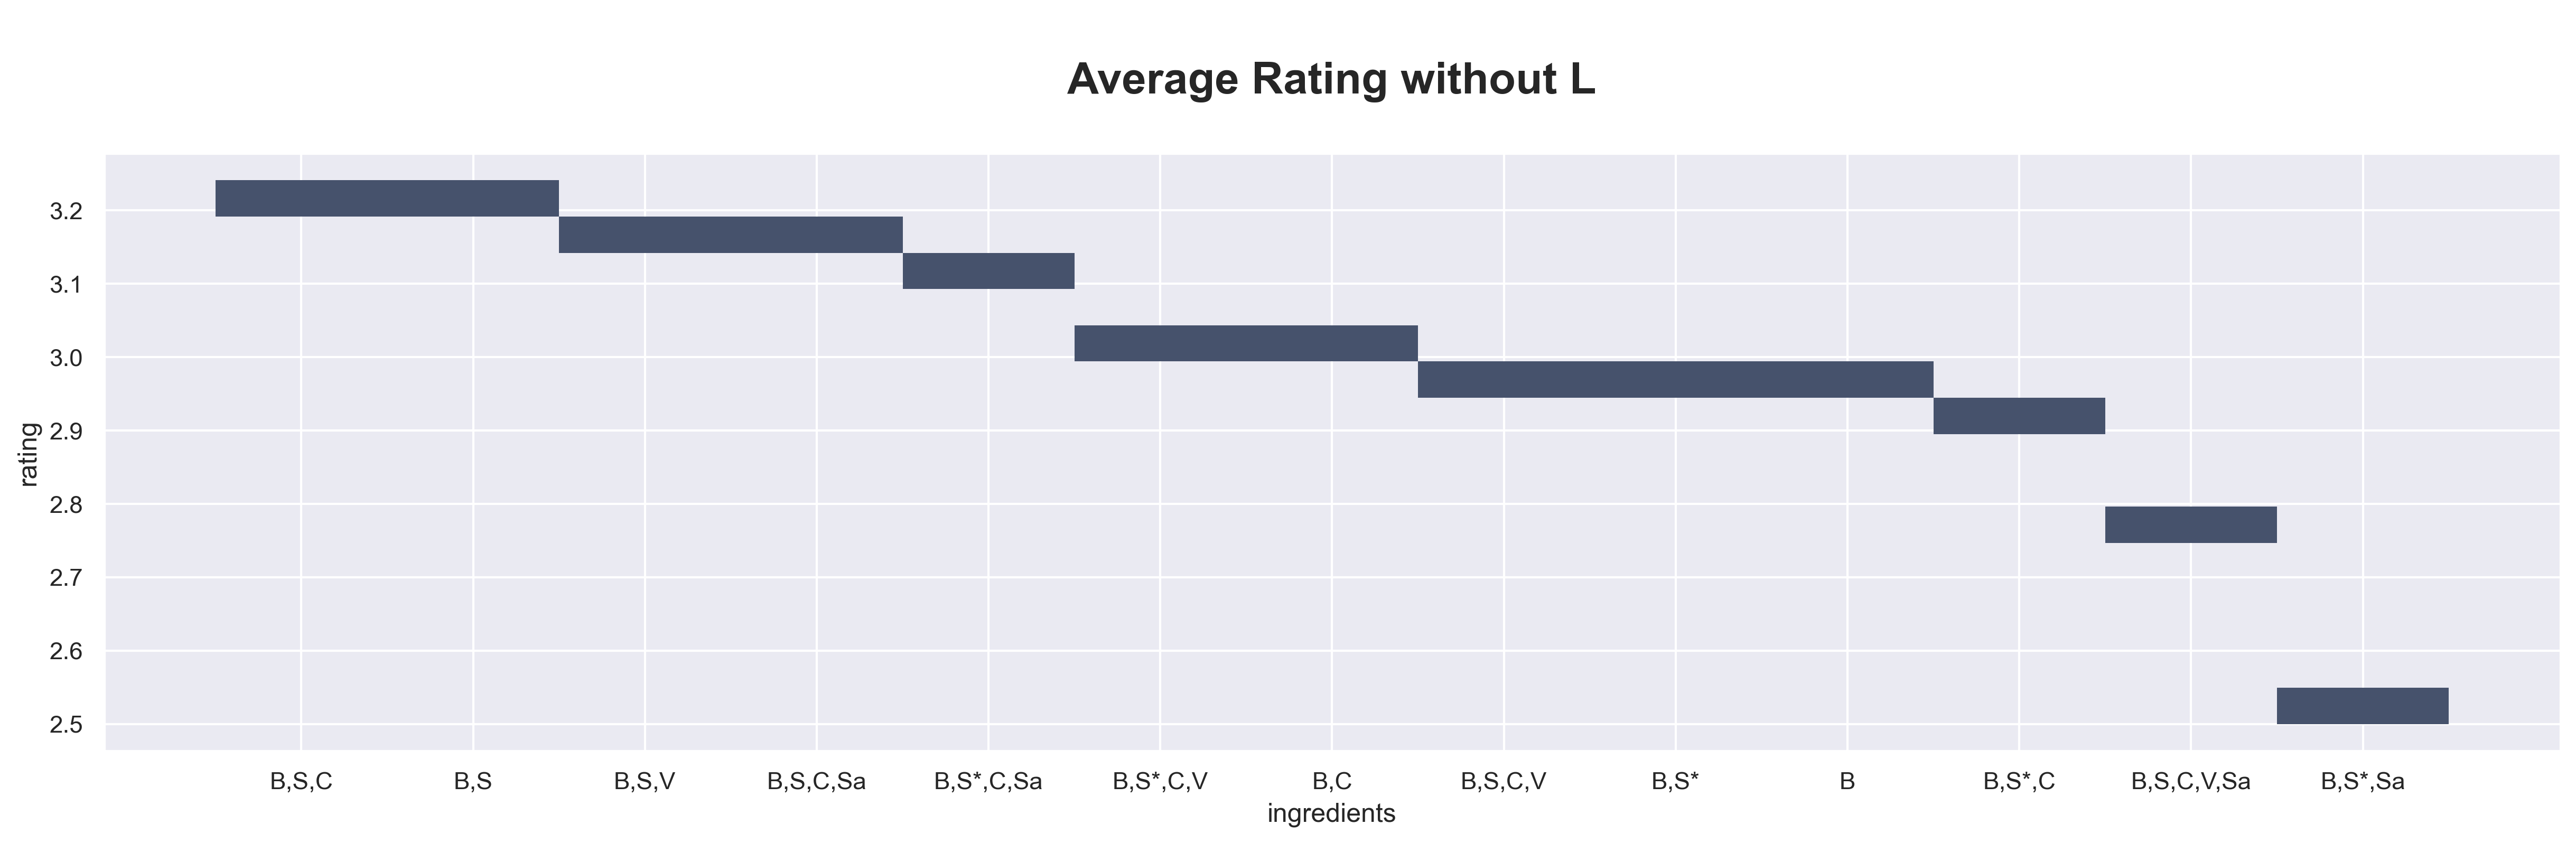

In [41]:
# distribution plot 2
sns.histplot(data=ingr_rating[ingr_rating['ingredients'].isin(without_L)],\
             x='ingredients', y='rating',bins=15)
plt.title('\n Average Rating without L \n', fontsize=20, fontweight='bold');

* There is a lower count of people who prefer chocolates with Lecithin than people who prefer chocolate without Lecithin.

In [42]:
sum_rating = choco_bars.groupby('year_reviewed')[['rating']].sum()\
.reset_index().sort_values(by='rating', ascending=False)
sum_rating

,year_reviewed,rating
9,2015,921.50
8,2014,787.75
12,2018,727.75
10,2016,700.50
6,2012,617.00
13,2019,605.00
7,2013,585.00
15,2021,581.00
5,2011,531.00
3,2009,378.00


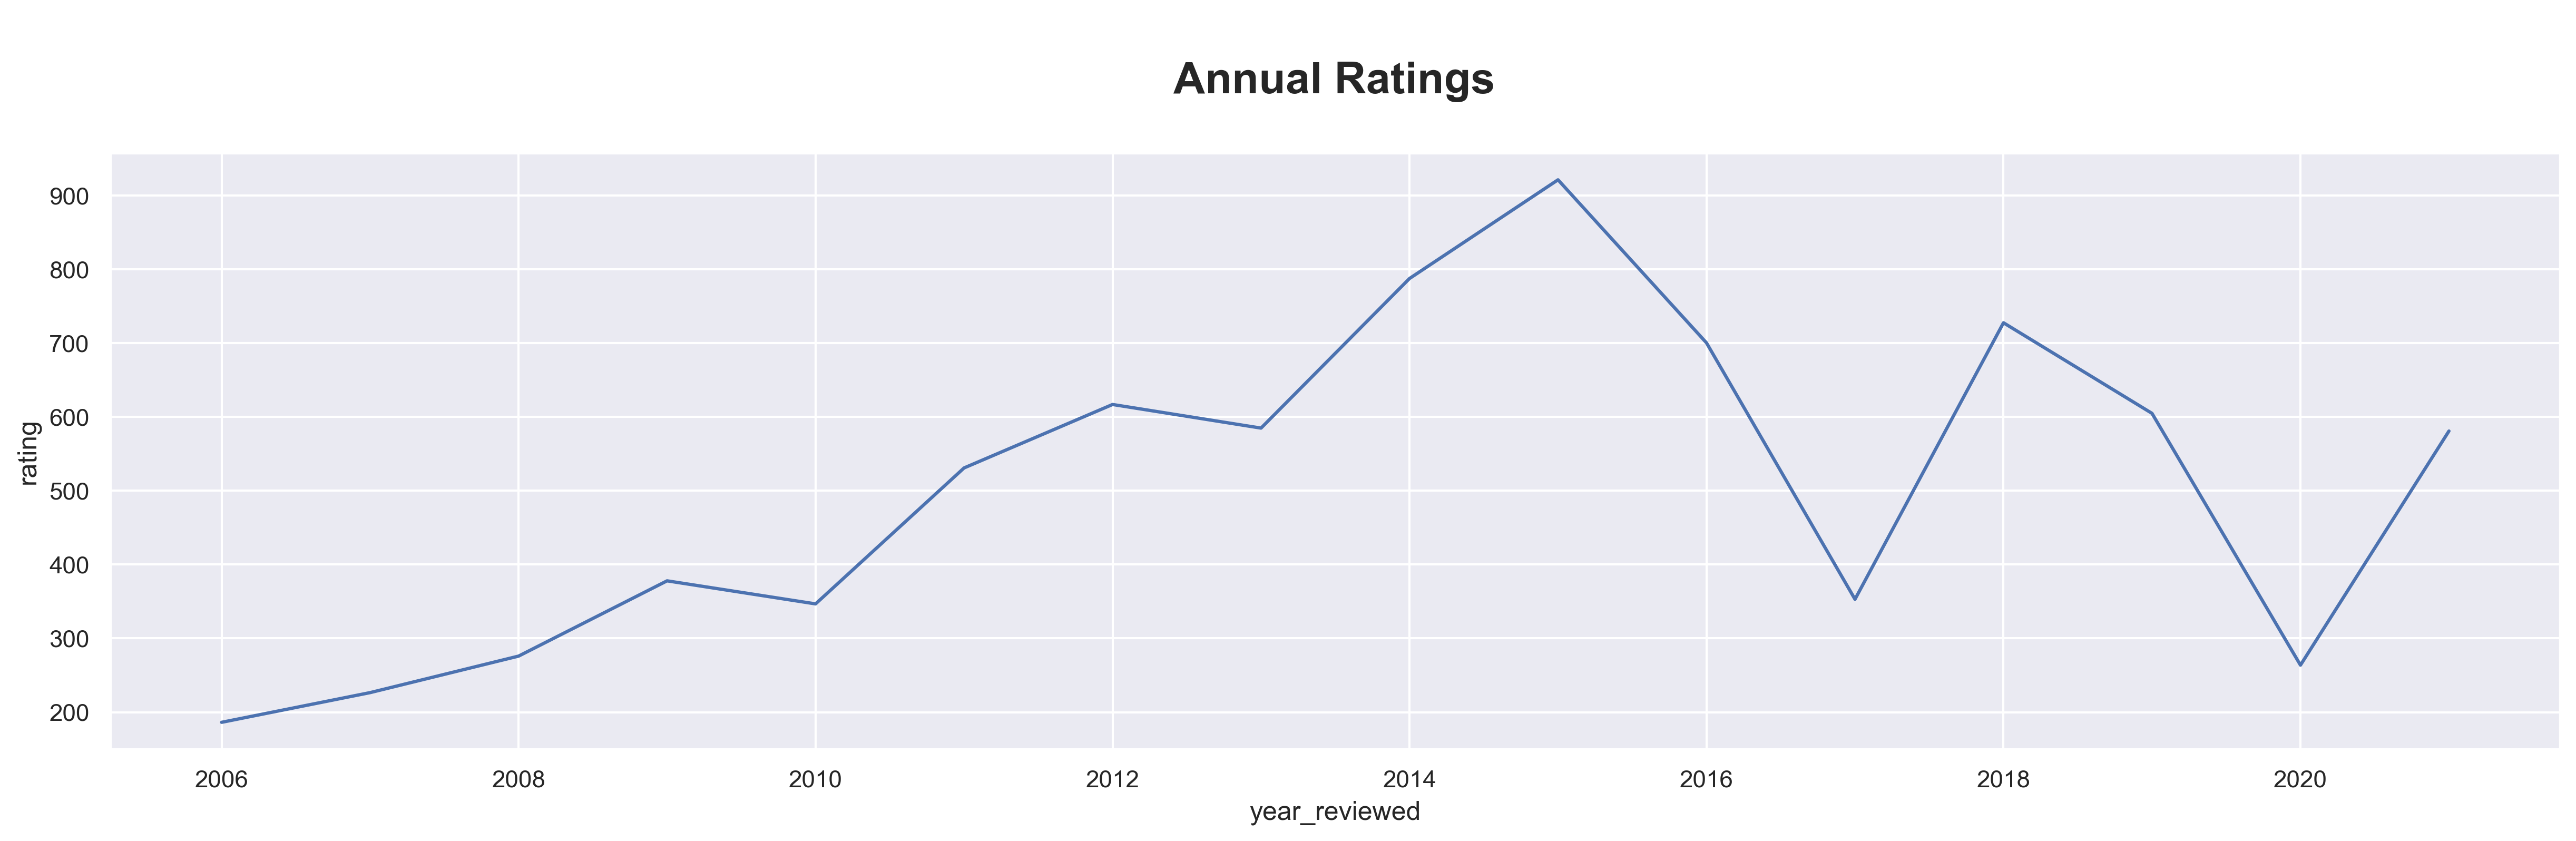

In [43]:
sns.lineplot(x='year_reviewed', y='rating',data = sum_rating)
plt.title('\n Annual Ratings \n', fontsize=20, fontweight='bold');

* Ratings appear to have increased throughout the years, with a likely continuation of this trend.

> ### Summary

Tobago and Venezuela had the highest ratings and reviews on average. Venezuela, Peru, and the Dominican Republic contributed the majority of the reviews. Tobago, China, and Sao Tome & Principe were the only three nations with highly rated chocolates.

Lecithin was found in 403 of the 2443 chocolate bars. However, the chocolates produced with beans, sugar, and cocoa butter received the highest ratings. The year 2015 had the best ratings.